In [ ]:
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/drive')

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'University of Michigan - Ann Arbor/si670/project'

Mounted at /content/drive


In [ ]:
import os
import shutil

import sys
assert sys.version_info[0]==3
assert sys.version_info[1] >= 5

GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
sys.path.append(GOOGLE_DRIVE_PATH)

print(os.listdir(GOOGLE_DRIVE_PATH))

['flights.csv', 'airports.csv', 'weather.csv', 'airlines.csv', 'planes.csv', 'SI670_Project.ipynb', 'Copy of SI670_Project.ipynb']


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 


In [ ]:
airports = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'airports.csv'), index_col=0)
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
1,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
2,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
3,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
4,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
5,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [ ]:
flights = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'flights.csv'), index_col=0).dropna()
flights = flights[flights['month'] == 1]
flights = flights.drop(columns=['year', 'month', 'day', 'hour', 'month', 'minute', 'dest', 'air_time', 'dep_time', 'arr_time', 'arr_delay'], axis=1)

mean = flights['dep_delay'].mean()
std = flights['dep_delay'].std()
flights = flights[(flights['dep_delay'] <= mean + 2 * std) & (flights['dep_delay'] >= mean - 2 * std)]

flights['time_hour'] = flights['time_hour'].apply(lambda x: pd.to_datetime(x).timestamp())

# labelencoder= LabelEncoder()
# flights['origin'] = labelencoder.fit_transform(flights['origin'])
# flights['carrier'] = labelencoder.fit_transform(flights['carrier'])

print(len(flights))
flights

25219


,sched_dep_time,dep_delay,sched_arr_time,carrier,flight,tailnum,origin,distance,time_hour
1,515,2.0,819,UA,1545,N14228,EWR,1400,1.357016e+09
2,529,4.0,830,UA,1714,N24211,LGA,1416,1.357016e+09
3,540,2.0,850,AA,1141,N619AA,JFK,1089,1.357016e+09
4,545,-1.0,1022,B6,725,N804JB,JFK,1576,1.357016e+09
5,600,-6.0,837,DL,461,N668DN,LGA,762,1.357020e+09
...,...,...,...,...,...,...,...,...,...
26909,2250,-4.0,2354,B6,1018,N708JB,JFK,187,1.359670e+09
26910,2135,74.0,36,B6,11,N652JB,JFK,1069,1.359666e+09
26911,2253,-3.0,15,B6,112,N794JB,JFK,301,1.359670e+09
26914,2245,12.0,2357,B6,128,N634JB,JFK,266,1.359670e+09


In [ ]:
flights.columns

Index(['sched_dep_time', 'dep_delay', 'sched_arr_time', 'carrier', 'flight',
       'tailnum', 'origin', 'distance', 'time_hour'],
      dtype='object')

In [ ]:
planes = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'planes.csv'), index_col=0)
planes = planes.drop(columns=['year', 'type', 'manufacturer', 'speed'], axis=1)
planes.head()

,tailnum,model,engines,seats,engine
1,N10156,EMB-145XR,2,55,Turbo-fan
2,N102UW,A320-214,2,182,Turbo-fan
3,N103US,A320-214,2,182,Turbo-fan
4,N104UW,A320-214,2,182,Turbo-fan
5,N10575,EMB-145LR,2,55,Turbo-fan


In [ ]:
weather = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'weather.csv'), index_col=0)
weather = weather.drop(columns=['year', 'month', 'day', 'hour', 'month'], axis=1)
weather['time_hour'] = weather['time_hour'].apply(lambda x: pd.to_datetime(x).timestamp())

weather

,origin,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
1,EWR,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,1.357002e+09
2,EWR,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,1.357006e+09
3,EWR,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,1.357009e+09
4,EWR,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,1.357013e+09
5,EWR,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,1.357016e+09
...,...,...,...,...,...,...,...,...,...,...,...
26111,LGA,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,1.388412e+09
26112,LGA,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,1.388416e+09
26113,LGA,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,1.388419e+09
26114,LGA,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,1.388423e+09


In [ ]:
flight_df = pd.merge(flights, weather, on=['origin', 'time_hour'], how='left')
flight_df = pd.merge(flight_df, planes, on=['tailnum'], how='left')
flight_df = flight_df.drop(columns=['tailnum'], axis=1)

labelencoder= LabelEncoder()
flight_df['origin'] = labelencoder.fit_transform(flight_df['origin'])
flight_df['carrier'] = labelencoder.fit_transform(flight_df['carrier'])
flight_df['model'] = labelencoder.fit_transform(flight_df['model'])
flight_df['engine'] = labelencoder.fit_transform(flight_df['engine'])

for column in flight_df.columns:
    if flight_df.dtypes[column] == float:
        flight_df[column].fillna(value=flight_df[column].mean(), inplace=True)

flight_df

,sched_dep_time,dep_delay,sched_arr_time,carrier,flight,origin,distance,time_hour,temp,dewp,...,wind_dir,wind_speed,wind_gust,precip,pressure,visib,model,engines,seats,engine
0,515,2.0,819,11,1545,0,1400,1.357016e+09,39.02,28.04,...,260.0,12.65858,27.619641,0.0,1011.9,10.0,31,2.0,149.0,2
1,529,4.0,830,11,1714,2,1416,1.357016e+09,39.92,24.98,...,250.0,14.96014,21.864820,0.0,1011.4,10.0,31,2.0,149.0,2
2,540,2.0,850,1,1141,1,1089,1.357016e+09,39.02,26.96,...,260.0,14.96014,27.619641,0.0,1012.1,10.0,41,2.0,178.0,2
3,545,-1.0,1022,3,725,1,1576,1.357016e+09,39.02,26.96,...,260.0,14.96014,27.619641,0.0,1012.1,10.0,71,2.0,200.0,2
4,600,-6.0,837,4,461,2,762,1.357020e+09,39.92,24.98,...,260.0,16.11092,23.015600,0.0,1011.7,10.0,44,2.0,178.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25214,2250,-4.0,2354,3,1018,1,187,1.359670e+09,30.92,8.06,...,270.0,29.92028,40.277300,0.0,1008.9,10.0,71,2.0,200.0,2
25215,2135,74.0,36,3,11,1,1069,1.359666e+09,32.00,17.06,...,270.0,27.61872,34.523400,0.0,1008.4,10.0,71,2.0,200.0,2
25216,2253,-3.0,15,3,112,1,301,1.359670e+09,30.92,8.06,...,270.0,29.92028,40.277300,0.0,1008.9,10.0,71,2.0,200.0,2
25217,2245,12.0,2357,3,128,1,266,1.359670e+09,30.92,8.06,...,270.0,29.92028,40.277300,0.0,1008.9,10.0,71,2.0,200.0,2


In [ ]:
flight_df.columns

Index(['sched_dep_time', 'dep_delay', 'sched_arr_time', 'carrier', 'flight',
       'origin', 'distance', 'time_hour', 'temp', 'dewp', 'humid', 'wind_dir',
       'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'model',
       'engines', 'seats', 'engine'],
      dtype='object')

In [ ]:
dep_delays = flight_df["dep_delay"]
dep_delays

0         2.0
1         4.0
2         2.0
3        -1.0
4        -6.0
         ... 
25214    -4.0
25215    74.0
25216    -3.0
25217    12.0
25218    73.0
Name: dep_delay, Length: 25219, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(flight_df.drop(columns=['dep_delay']), dep_delays, random_state=0)

# train_numerical_features = X_train[['dep_time', 'arr_time',
#                                     'carrier', 'flight', 'origin',
#                                     'distance', 'time_hour']]
# # train_categorical_features = X_train[["carrier"]]
# test_numerical_features = X_test[['dep_time', 'arr_time',
#                                     'carrier', 'flight', 'origin',
#                                     'distance', 'time_hour']]
# test_categorical_features = X_test[["carrier"]]
# OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
# OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_categorical_features))
# OH_cols_test = pd.DataFrame(OH_encoder.transform(test_categorical_features))
# OH_cols_train.index = X_train.index
# OH_cols_test.index = X_test.index
# OH_X_train = pd.concat([train_numerical_features, OH_cols_train], axis=1)
# OH_X_val = pd.concat([test_numerical_features, OH_cols_test], axis=1)

OH_X_train = X_train
OH_X_val = X_test

print(OH_X_train.head())
print(OH_X_val.head())

      sched_dep_time  sched_arr_time  carrier  flight  origin  distance  \
4523            1445            1606        0    3452       1       187   
437             1500            1655        9    4429       2       479   
1657            2110            2212        5    4404       0       160   
8481            2045            2154        3    1178       0       200   
2359            1800            1917        3    1016       1       187   

         time_hour   temp   dewp  humid  wind_dir  wind_speed  wind_gust  \
4523  1.357481e+09  44.96  30.02  55.56     220.0    10.35702  27.619641   
437   1.357052e+09  39.02  21.92  49.93     310.0    12.65858  21.864820   
1657  1.357160e+09  30.02  14.00  50.84     270.0     5.75390  27.619641   
8481  1.357848e+09  44.06  23.00  43.02     340.0     6.90468  27.619641   
2359  1.357236e+09  30.92  15.08  51.38     250.0    14.96014  27.619641   

      precip  pressure  visib  model   engines       seats  engine  
4523     0.0    1015.6 

In [88]:
# dummy regressor (baseline)
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(OH_X_train, y_train)
res = dummy_regr.predict(OH_X_val)
mean_squared_error(y_test, res)

297.89357643714266

In [71]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

parameters = {"gbc__n_estimators": [200], "gbc__learning_rate": [0.1], "gbc__random_state": [0]}

pipePCA = Pipeline([('gbc', GradientBoostingRegressor())])
regPCA = GridSearchCV(pipePCA, parameters, scoring="neg_mean_squared_error")
regPCA.fit(OH_X_train, y_train)
print(regPCA.best_params_)
regPCA.score(OH_X_val, y_test)

{'gbc__learning_rate': 0.1, 'gbc__n_estimators': 200, 'gbc__random_state': 0}


-254.77809961764052

In [72]:
parameters = {"gbc__n_estimators": [200], "gbc__learning_rate": [0.2], "gbc__random_state": [0]}

scores = []
for feature in flight_df.drop(columns=['dep_delay'], axis=1).columns:
    X_train, X_test, y_train, y_test = train_test_split(flight_df.drop(columns=['dep_delay', feature]), dep_delays, random_state=0)

    pipe = Pipeline([('gbc', GradientBoostingRegressor())])
    clf = GridSearchCV(pipe, parameters, scoring="neg_mean_squared_error")
    clf.fit(X_train, y_train)    
    scores.append(clf.score(X_test, y_test))
    print(scores[-1])



-254.6833559105953
-254.73501979713188
-254.40753868175926
-254.30907900999333
-254.86395727151688
-254.20169393569242
-258.51638438190264
-254.6656773472073
-253.68975307303418
-254.47243018427443
-253.64723518144197
-253.9208279038518
-253.68519172958614
-254.21354687943554
-255.01019714695389
-253.6323737946945
-254.19828618371224
-254.34999371729361
-254.67266292807622
-253.56325653345337


In [73]:
flight_df.columns

Index(['sched_dep_time', 'dep_delay', 'sched_arr_time', 'carrier', 'flight',
       'origin', 'distance', 'time_hour', 'temp', 'dewp', 'humid', 'wind_dir',
       'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'model',
       'engines', 'seats', 'engine'],
      dtype='object')

In [80]:
feature_score = {}
for i in range(len(scores)):
    feature_score[flight_df.drop(columns=['dep_delay']).columns[i]] = -scores[i]

feature_score.pop('dep_delay', None)
feature_score = sorted(feature_score.items(), key=lambda x:x[1])
feature_score

[('engine', 253.56325653345337),
 ('visib', 253.6323737946945),
 ('wind_dir', 253.64723518144197),
 ('wind_gust', 253.68519172958614),
 ('dewp', 253.68975307303418),
 ('wind_speed', 253.9208279038518),
 ('model', 254.19828618371224),
 ('distance', 254.20169393569242),
 ('precip', 254.21354687943554),
 ('flight', 254.30907900999333),
 ('engines', 254.34999371729361),
 ('carrier', 254.40753868175926),
 ('humid', 254.47243018427443),
 ('temp', 254.6656773472073),
 ('seats', 254.67266292807622),
 ('sched_dep_time', 254.6833559105953),
 ('sched_arr_time', 254.73501979713188),
 ('origin', 254.86395727151688),
 ('pressure', 255.01019714695389),
 ('time_hour', 258.51638438190264)]

In [81]:
len(feature_score)

20

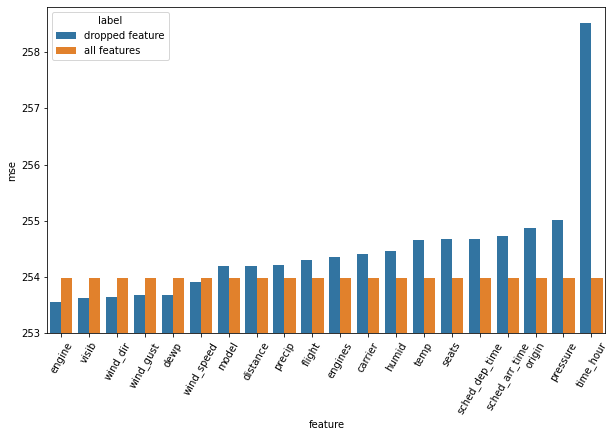

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

plot_df = pd.DataFrame.from_dict(feature_score)
plot_df.columns = ['feature', 'mse']
plot_df['label'] = ['dropped feature'] * len(plot_df)

temp_df = pd.DataFrame()
temp_df['feature'] = flight_df.drop(columns=['dep_delay'], axis=1).columns
temp_df['mse'] = [253.9774255968446] * len(plot_df)
temp_df['label'] = ['all features'] * len(plot_df)

plot_df = pd.concat([plot_df, temp_df])
ax = sns.barplot(data=plot_df, x="feature", y="mse", hue="label")
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.ylim(253, 258.8)
rcParams['figure.figsize'] = 10, 6

In [87]:
flight_df_cp = flight_df.copy()
flight_df_cp = flight_df_cp.drop(columns=['engine', 'visib', 'wind_dir', 'wind_gust', 'dewp', 'humid', 'engines', 'precip', 'distance', 'wind_speed', 'carrier'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(flight_df_cp.drop(columns=['dep_delay']), dep_delays, random_state=0)

parameters = {"gbc__n_estimators": [200], "gbc__learning_rate": [0.2], "gbc__random_state": [0]}

pipePCA = Pipeline([('gbc', GradientBoostingRegressor())])
regPCA = GridSearchCV(pipePCA, parameters, scoring="neg_mean_squared_error")
regPCA.fit(X_train, y_train)
regPCA.score(X_test, y_test)

-253.53087153851385